# **Data Visualization**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## How to work with database


Download database file.


In [26]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-29 16:00:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  58.5MB/s    in 0.6s    

2024-07-29 16:00:18 (58.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [27]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [28]:
import pandas as pd

## How to run an sql query


In [29]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## How to list all tables


In [30]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## How to run a group by query


In [31]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## How to describe a table


In [32]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


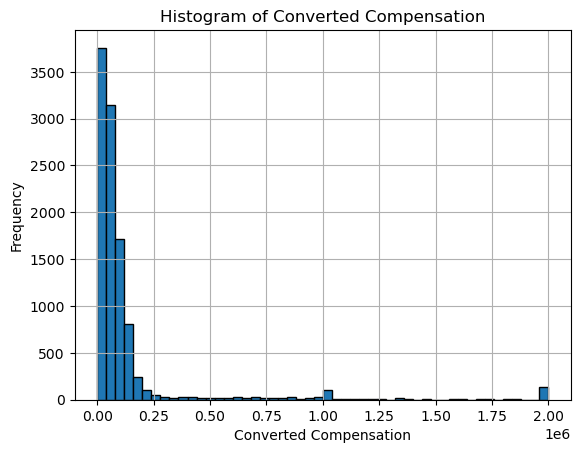

In [33]:
import matplotlib.pyplot as plt

conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.hist(df['ConvertedComp'].dropna(), bins=50, edgecolor='k')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


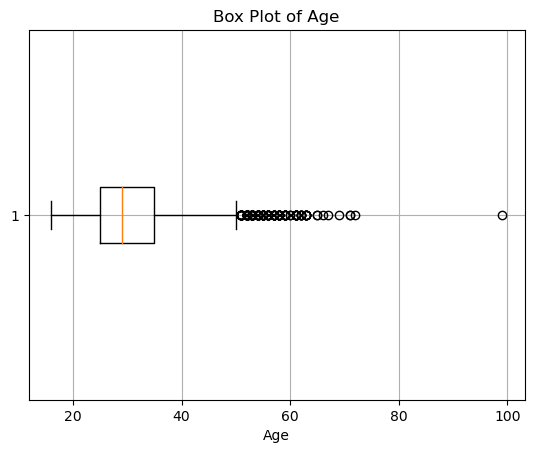

In [34]:
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.boxplot(df['Age'].dropna(), vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.grid(True)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


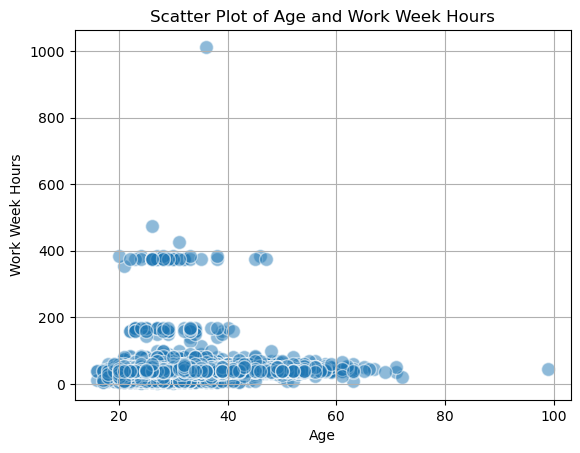

In [35]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

df = df.dropna(subset=['Age', 'WorkWeekHrs'])

plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5, edgecolors='w', s=100)
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Scatter Plot of Age and Work Week Hours')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


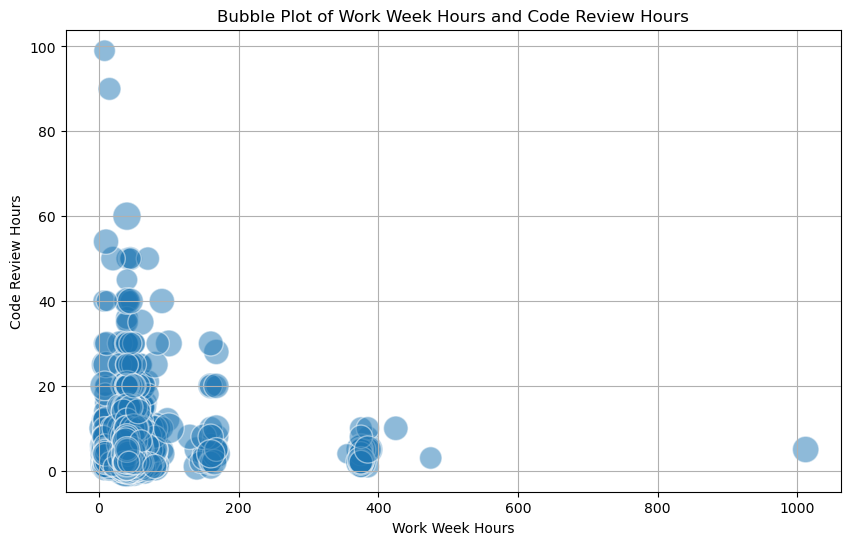

In [36]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

df = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

bubble_size = df['Age'] / df['Age'].max() * 1000

plt.figure(figsize=(10, 6))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.5, edgecolors='w')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot of Work Week Hours and Code Review Hours')
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


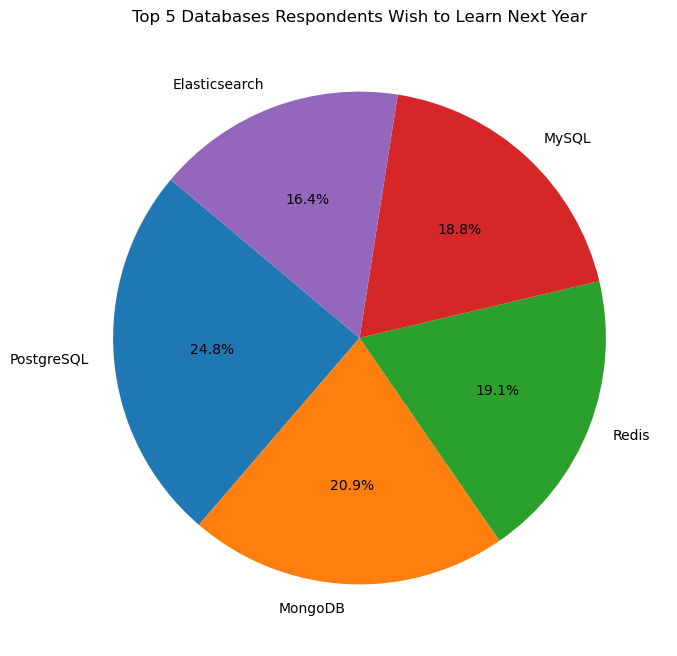

In [37]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


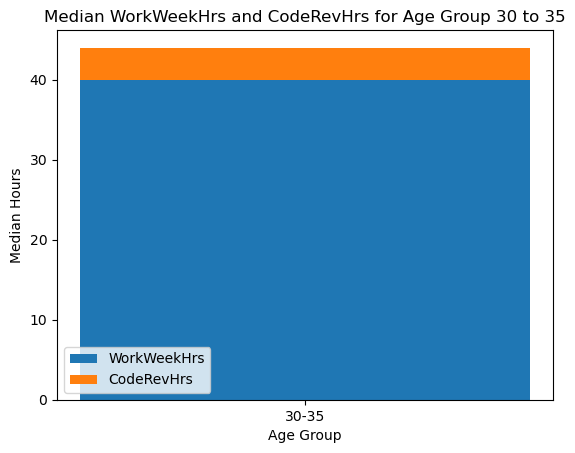

In [38]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY, conn)

median_work_week_hrs = df['WorkWeekHrs'].median()
median_code_rev_hrs = df['CodeRevHrs'].median()

age_group = ['30-35']
work_week_hrs = [median_work_week_hrs]
code_rev_hrs = [median_code_rev_hrs]

fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(age_group, work_week_hrs, bar_width, label='WorkWeekHrs')
bar2 = ax.bar(age_group, code_rev_hrs, bar_width, bottom=work_week_hrs, label='CodeRevHrs')

ax.set_xlabel('Age Group')
ax.set_ylabel('Median Hours')
ax.set_title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
ax.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


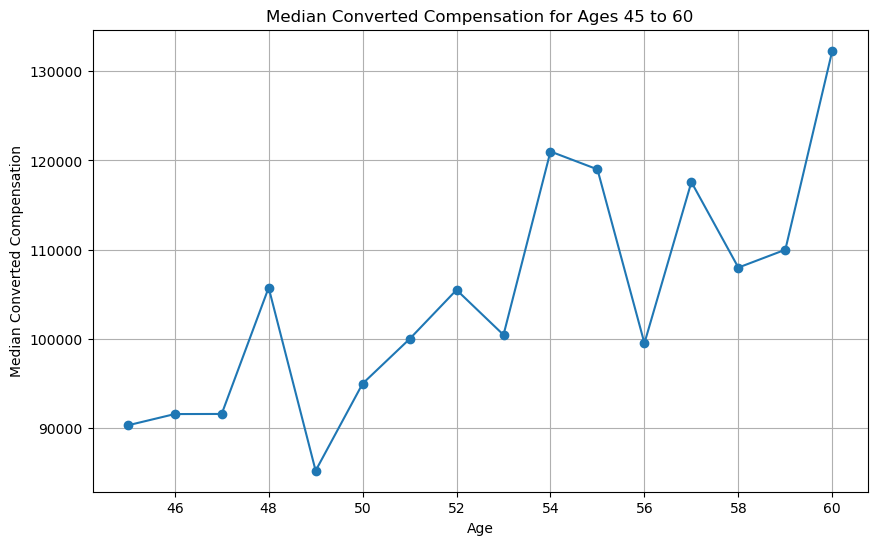

In [39]:
conn = sqlite3.connect("m4_survey_data.sqlite")

# Line Chart: Plot the median ConvertedComp for all ages from 45 to 60
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)

median_converted_comp = df.groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(10, 6))
median_converted_comp.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.title('Median Converted Compensation for Ages 45 to 60')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


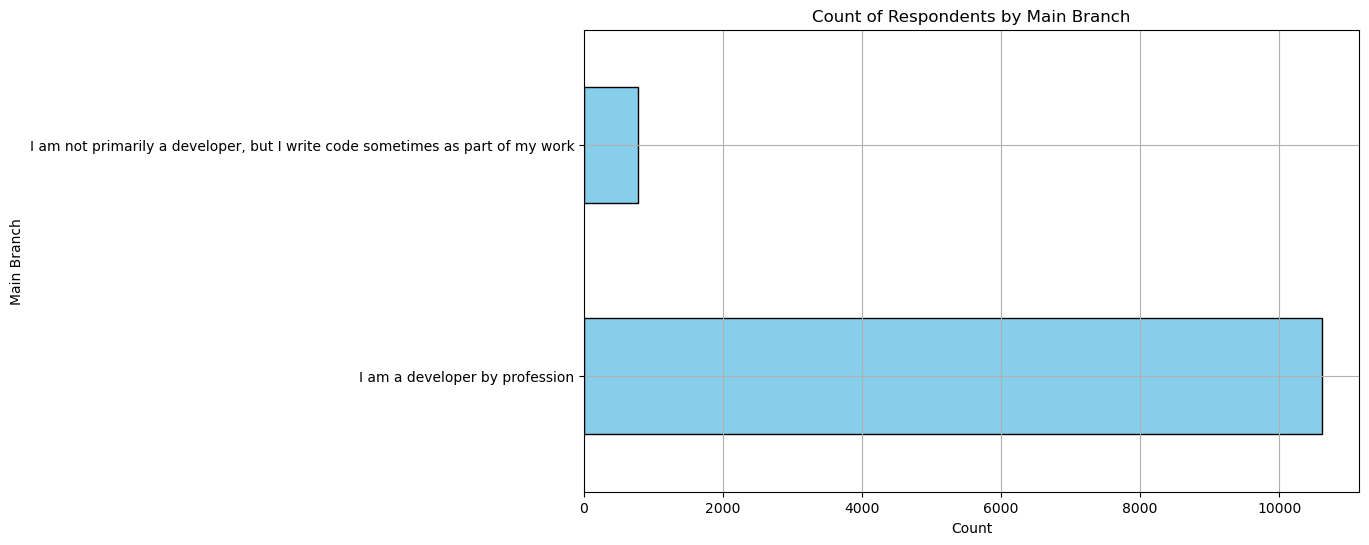

In [40]:
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
df.set_index('MainBranch')['count'].plot(kind='barh', color='skyblue', edgecolor='k')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Count of Respondents by Main Branch')
plt.grid(True)
plt.show()

Close the database connection.


In [41]:
conn.close()

<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
